<div style="display: flex; align-items: center; justify-content: center; gap: 20px;">
  <!-- Left Column: Image -->
  <div style="flex: 1; text-align: center;">
    <img src="https://i0.wp.com/cdcs.web.ua.pt/wp-content/uploads/2022/05/cropped-cropped-Picture13-1.png?w=968" width="370" height="200" style="display: block; margin: auto;"/>
  </div>

  <!-- Right Column: Text -->
  <div style="flex: 1; text-align: left;">
    <div><strong style="color: #4F5B63; font-size: 1.5em;">Master in Data Science for Social Sciences</strong></div>
    <div><strong style="color: #4F5B63; font-size: 1.2em;">University of Aveiro</strong></div>
    <p style="color: #46627F; font-weight: bold; font-style: italic;">Statistics and Optimization for Decision Support - 2025/2026</p>
    <p style="color: #4F5B63;"></p>
    <p style="color: #4F5B63;">Paulo Batista</p>
  </div>
</div>

<div style="display: flex; justify-content: space-around; align-items: flex-start;">
  <div style="width: 100%; padding: 10px; box-shadow: 0 2px 4px rgba(0,0,0,0.1); margin: 10px;">
    <h2><h1 style="text-align: center; font-size: 4em; color: #46627F; margin-top: 0; margin-bottom: 0; line-height: 1;">Block 1</h1>
    <p>
<h1 style="text-align: center; color: #B1C0CF; margin-top: 0; margin-bottom: 0; line-height: 1;"> - Inferential Statistics - Part 1 B- </h1>
</p>

</h2>
      </div>
</div>

# **PART I - Importing libraries and dataset**

In [60]:
import os
import sys

from pathlib import Path

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
import seaborn as sns
sns.set_theme()


from statsmodels.distributions.empirical_distribution import ECDF
from scipy.stats import binom
import scipy.stats as stats  # This library contains a large number of probability distributions as well as a growing library of statistical functions


from pprint import pprint as pp

from sklearn.datasets import load_iris


# Define Working directory at the root of the repository



In [61]:
# Find the project root (assuming marker-based or script-relative path)
def find_project_root(marker="README.md"):
    current_dir = Path.cwd()
    while current_dir != current_dir.parent:  # Traverse up until root
        if (current_dir / marker).exists():
            return current_dir
        current_dir = current_dir.parent
    raise FileNotFoundError(f"Marker '{marker}' not found in any parent directory.")

project_root = find_project_root()
sys.path.append(str(project_root)) 

# Or use a relative path: project_root = Path(__file__).resolve().parent.parent
os.chdir(project_root)
print(f"Working directory set to: {project_root}")

Working directory set to: c:\Users\paulo\OneDrive\TRABALHO_AULAS\AL20252026\1S_MstCDCS_EOAD\Block1\EOAD_Block1_PracticeRepository


## **Loading the  Data**

In [29]:
#df =pd.read_csv('Example Students_database.csv')
df =pd.read_excel(r'./data/inputs/Students_database.xlsx')
df.head()

,ID,cycleofstudy,Ano,age,1stmathstest,2ndmathstest,3rdmathstest,sex,size_class,hours,repeating
0,1,1º cycle,2015,8,10,8,5,male,small,9,0
1,2,1º cycle,2015,8,10,6,1,male,small,5,0
2,3,1º cycle,2015,8,10,10,14,female,small,8,0
3,4,1º cycle,2013,10,10,8,5,female,small,7,0
4,5,1º cycle,2015,8,10,9,5,female,small,8,0


In [30]:
# Calculate the average of the three math test scores
df['average_math'] = (df['1stmathstest']+df['2ndmathstest']+df['3rdmathstest'])/3
df

,ID,cycleofstudy,Ano,age,1stmathstest,2ndmathstest,3rdmathstest,sex,size_class,hours,repeating,average_math
0,1,1º cycle,2015,8,10,8,5,male,small,9,0,7.666667
1,2,1º cycle,2015,8,10,6,1,male,small,5,0,5.666667
2,3,1º cycle,2015,8,10,10,14,female,small,8,0,11.333333
3,4,1º cycle,2013,10,10,8,5,female,small,7,0,7.666667
4,5,1º cycle,2015,8,10,9,5,female,small,8,0,8.000000
...,...,...,...,...,...,...,...,...,...,...,...,...
195,196,3º cycle,2008,15,19,10,9,female,big,8,0,12.666667
196,197,3º cycle,2010,13,19,12,16,female,big,16,0,15.666667
197,198,3º cycle,2009,14,19,12,17,male,big,20,0,16.000000
198,199,3º cycle,2009,14,19,8,6,male,big,11,0,11.000000


# **PART II - Descriptive statistics**

In [31]:
# descriprive statistics for the numerical variables
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,200.0,100.500000,57.879185,1.000000,50.75,100.5,150.250000,200.0
Ano,200.0,2009.775000,1.913815,2006.000000,2008.00,2010.0,2011.000000,2015.0
age,200.0,13.225000,1.913815,8.000000,12.00,13.0,15.000000,17.0
1stmathstest,200.0,14.555000,2.898098,10.000000,12.00,15.0,17.000000,19.0
2ndmathstest,200.0,9.960000,2.629252,2.000000,9.00,10.0,11.000000,20.0
3rdmathstest,200.0,10.790000,4.939422,1.000000,7.00,11.0,15.000000,19.0
hours,200.0,11.335000,3.854486,4.000000,8.00,11.0,14.000000,24.0
repeating,200.0,0.520000,0.500854,0.000000,0.00,1.0,1.000000,1.0
average_math,200.0,11.768333,2.680908,4.333333,10.00,12.0,13.666667,18.0


In [32]:
df

,ID,cycleofstudy,Ano,age,1stmathstest,2ndmathstest,3rdmathstest,sex,size_class,hours,repeating,average_math
0,1,1º cycle,2015,8,10,8,5,male,small,9,0,7.666667
1,2,1º cycle,2015,8,10,6,1,male,small,5,0,5.666667
2,3,1º cycle,2015,8,10,10,14,female,small,8,0,11.333333
3,4,1º cycle,2013,10,10,8,5,female,small,7,0,7.666667
4,5,1º cycle,2015,8,10,9,5,female,small,8,0,8.000000
...,...,...,...,...,...,...,...,...,...,...,...,...
195,196,3º cycle,2008,15,19,10,9,female,big,8,0,12.666667
196,197,3º cycle,2010,13,19,12,16,female,big,16,0,15.666667
197,198,3º cycle,2009,14,19,12,17,male,big,20,0,16.000000
198,199,3º cycle,2009,14,19,8,6,male,big,11,0,11.000000


# **PART III - Inferential statistics**

### Calculating the mean and standard deviation (parameters) of the score math test 


In [33]:
# import the required function
from scipy.stats import norm

# estimate the mean and standard deviation of the SAT scores data
mu = df["average_math"].mean()
sigma = df["average_math"].std()

print("The estimated mean is", round(mu, 2))
print("The estimated standard deviation is", round(sigma, 2))

The estimated mean is 11.77
The estimated standard deviation is 2.68


### Plotting the Distribution 

It  will help us analyze the shape of the data and visualize the PDF of normal distribution using the parameters (mean (mu) and Standard deviation (sigma)) from the data.

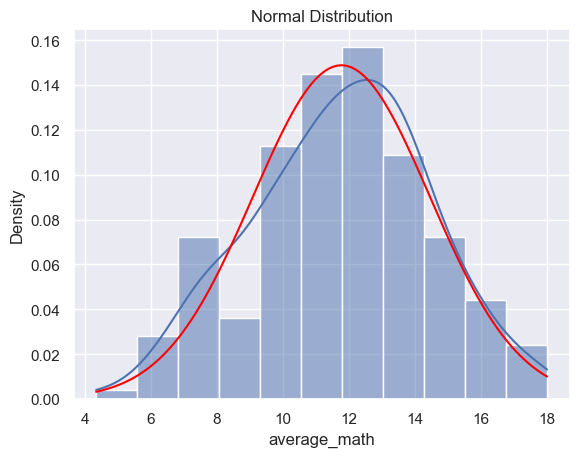

In [34]:
# calculate the pdf of math test scores using norm.pdf()
density = pd.DataFrame() # create an empty DataFrame
density["x"] = np.linspace(
    df["average_math"].min(), df["average_math"].max(), 100) # create an array of 100 numbers in between the min and max score range and store it in the first column of the empty DataFrame
density["pdf"] = norm.pdf(density["x"], mu, sigma) # calculate the pdf() of the created numbers and store it in another column named 'pdf'

fig, ax = plt.subplots() # create the subplot
sns.histplot(df["average_math"], ax=ax, kde=True, stat="density") # plot the distribution of data using histogram
ax.plot(density["x"], density["pdf"], color="red") # plot the pdf of the normal distribution
plt.title("Normal Distribution") # set the title
plt.show() # display the plot

**Insight:**  As you can see in the above plot, there are two curves red and blue. Blue curve represents the shape of data distribution and the red curve represents the PDF (Probability density function). This data is approximately normal. Thus, we can assume this data distribution to be normal and perform our calculations based on the normality assumption.

X ~ N(mu, sigma)

**Calculate the probability that a student will score less than a specific grade in math exams.**

In [35]:
X_grade=10

In [36]:
# find the cumulative probability
# norm.cdf() calculates the cumulative probability
prob_less_than_X = norm.cdf(X_grade, mu, sigma)
print(
    "The probability that a student will score less than X is",
    round(prob_less_than_X, 4),
)

The probability that a student will score less than X is 0.2548


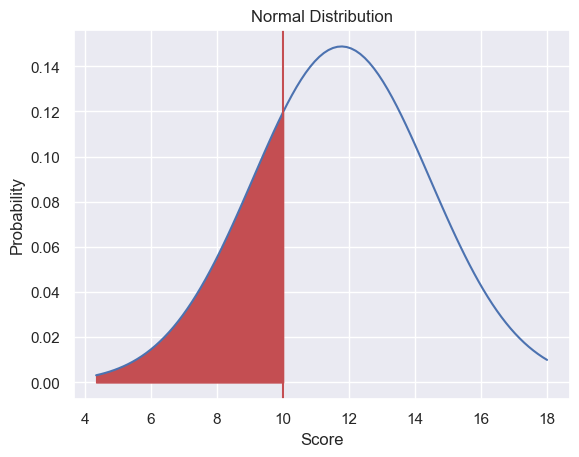

In [37]:
# plot the probability distribution
# We are plotting the distributions here to better visualize the calculations.
# Of course you do not 'need' to create the following visualization to answer the question above.
# You can directly use the cdf function for probability calculations.

plt.plot(density["x"], density["pdf"]) # plot the pdf of the normal distribution
plt.axvline(x=X_grade, c="r") # draw a red vertical line at x = X_grade
x1 = np.linspace(density["x"].min(), X_grade, 50) # create an array of 50 numbers between min math test score and X_grade
plt.fill_between(x1, norm.pdf(x1, mu, sigma), color="r") # fill the specified region with red color
plt.xlabel("Score") # set the x-axis label
plt.ylabel("Probability") # set the y-axis label
plt.title("Normal Distribution") # set the title
plt.show() # display the plot

**Calculate the probability that a student will score more than a specific grade in math exams.**

In [38]:
Y_grade=10

In [39]:
# find the cumulative probability and subtract it from 1 to calculate the probability that a student will score more than 1300
prob_greater_than_Y_grade = 1 - norm.cdf(Y_grade, mu, sigma)
print(
    "The probability that a student will score more than Y_grade is",
    round(prob_greater_than_Y_grade, 4),
)

The probability that a student will score more than Y_grade is 0.7452


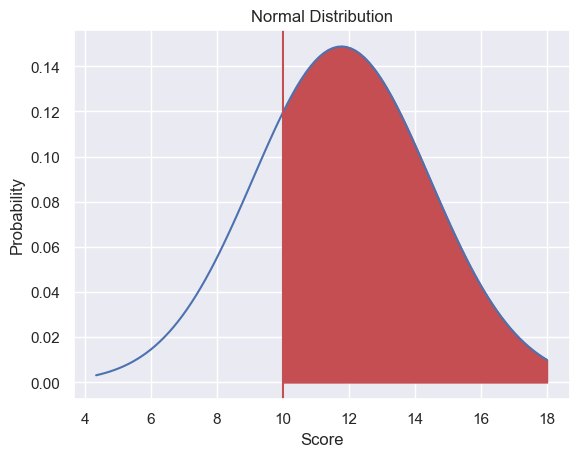

In [40]:
# plot the probability distribution
# We are plotting the distributions here to better visualize the calculations.
# Of course you do not 'need' to create the following visualization to answer the question above.
# You can directly use the cdf function for probability calculations.
plt.plot(density["x"], density["pdf"])
plt.axvline(x=Y_grade, c="r")
x1 = np.linspace(Y_grade, density["x"].max(), 50)
plt.fill_between(x1, norm.pdf(x1, mu, sigma), color="r")
plt.xlabel("Score")
plt.ylabel("Probability")
plt.title("Normal Distribution")
plt.show()

**Calculate the minimum marks a student must score in order to be in the x_th percentile**

In [41]:
#for example the 90th percentile
p= 0.9

In [42]:
# calculate the 90th percentile score using ppf() function
# norm.ppf() calculates the percentile point
score_90th_percentile = norm.ppf(p, mu, sigma)
print("The 90th percentile score should be", round(score_90th_percentile))

The 90th percentile score should be 15


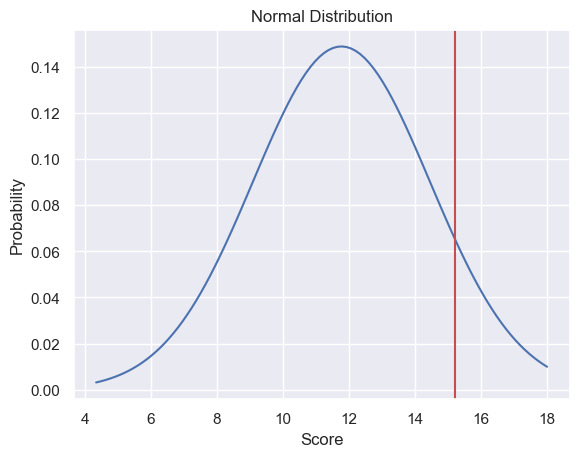

In [43]:
# plot the probability distribution
# We are plotting the distributions here to better visualize the calculations.
# Of course you do not 'need' to create the following visualization to answer the question above.
# You can directly use the cdf function for probability calculations.
plt.plot(density["x"], density["pdf"])
plt.axvline(x=score_90th_percentile, c="r")
plt.xlabel("Score")
plt.ylabel("Probability")
plt.title("Normal Distribution")
plt.show()

**Calculate the minimum marks a student must score in order to be in the top 5%**

In [44]:
# calculate the 95th percentile score using ppf() function
score_top_five_percent = norm.ppf(0.95, mu, sigma)
print("The minimum score to be in top 5% should be", round(score_top_five_percent))

The minimum score to be in top 5% should be 16


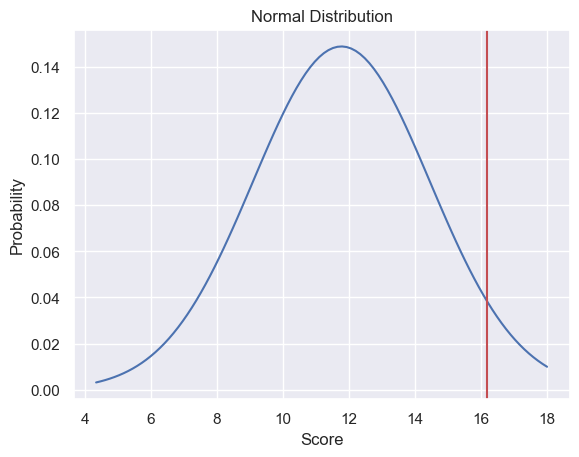

In [45]:
# plot the probability distribution
# We are plotting the distributions here to better visualize the calculations.
# Of course you do not 'need' to create the following visualization to answer the question above.
# You can directly use the cdf function for probability calculations.
plt.plot(density["x"], density["pdf"])
plt.axvline(x=score_top_five_percent, c="r")
plt.xlabel("Score")
plt.ylabel("Probability")
plt.title("Normal Distribution")
plt.show()

**Calculate Z-scores for the math test grades:** 

* Instruct students to calculate the Z-scores for each student's scores on the average of the three tests math tests (1st, 2nd, and 3rd).
* Which students performed exceptionally well or poorly compared to their peers?

In [46]:
df['average_math'].describe()

count    200.000000
mean      11.768333
std        2.680908
min        4.333333
25%       10.000000
50%       12.000000
75%       13.666667
max       18.000000
Name: average_math, dtype: float64

Z_score manually 

In [47]:
# Standardize 'average_math_score' using z-scores 
df['average_math_score'] = (df['average_math'] - df['average_math'].mean()) / df['average_math'].std()

# Display the DataFrame with standardized scores
print(df[['ID', 'average_math_score', 'average_math']])

      ID  average_math_score  average_math
0      1           -1.529954      7.666667
1      2           -2.275970      5.666667
2      3           -0.162258     11.333333
3      4           -1.529954      7.666667
4      5           -1.405618      8.000000
..   ...                 ...           ...
195  196            0.335085     12.666667
196  197            1.454109     15.666667
197  198            1.578445     16.000000
198  199           -0.286594     11.000000
199  200            0.086414     12.000000

[200 rows x 3 columns]


In [48]:
# Define a threshold for identifying exceptionally well or poorly performing students
z_score_threshold = 1.96  # You can adjust this threshold as needed

# Identify students who performed exceptionally well or poorly on the 3rd math test
exceptional_math_score = df[abs(df['average_math_score']) > z_score_threshold]

print(exceptional_math_score[['ID', 'average_math_score']])

      ID  average_math_score
1      2           -2.275970
6      7           -2.773314
12    13           -2.027298
33    34           -2.027298
51    52           -2.027298
55    56            2.200125
84    85            2.075789
97    98            2.200125
115  116           -2.027298
180  181            2.324461
193  194            2.075789


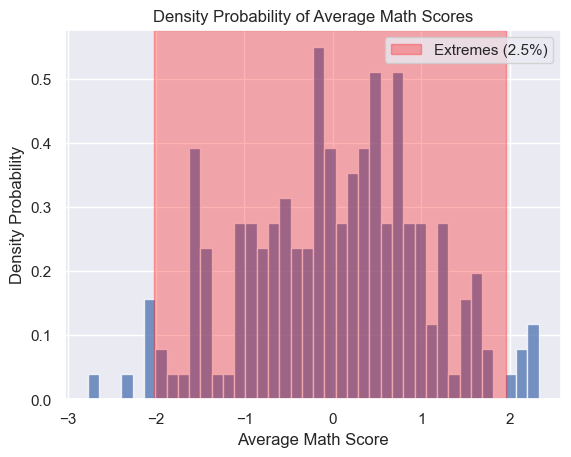

In [49]:
# Calculate the 2.5th percentile and 97.5th percentile for highlighting extremes
lower_percentile = np.percentile(df['average_math_score'], 2.5)
upper_percentile = np.percentile(df['average_math_score'], 97.5)

# Plot a histogram of the 'average_math_score'
plt.hist(df['average_math_score'], bins=40, density=True, alpha=0.75)
plt.xlabel('Average Math Score')
plt.ylabel('Density Probability')
plt.title('Density Probability of Average Math Scores')

# Highlight the extreme values by shading the corresponding region
plt.axvspan(lower_percentile, upper_percentile, alpha=0.3, color='red', label='Extremes (2.5%)')

plt.grid(True)
plt.legend()
plt.show()

**What is the probability that an individual will achieve a grade higher than 10?**

In [50]:
from scipy.stats import norm

average_math_mean = df['average_math'].mean()
average_math_std = df['average_math'].std()

# Calculate the z-score for the value 10
z_score_10 = (10 - average_math_mean) / average_math_std

# Calculate the probability of having a grade higher than 10
probability_higher_than_10 = 1 - norm.cdf(z_score_10)

print("Probability of having a grade higher than 10:", probability_higher_than_10)

Probability of having a grade higher than 10: 0.7452455030255398


# <a name='link5'>**Point Estimation**</a>

#### Insight

Usually, point estimate of an unknown population parameter is the corresponding sample statistic. 

For example:
- a. Population mean μ is estimated by the sample mean x̅.
- b. Population median is estimated by the sample median x̃.
- c. Population proportion of success π is estimated by the sample proportion of success p.

In [51]:
# Calculate the mean of the 'average_math'column in the DataFrame 'df'
sample_mean_math_test = df['average_math'].mean()

# Display the mean with 2 decimal places
print("The mean  of the math test score is: {:.2f}".format(sample_mean_math_test))

The mean  of the math test score is: 11.77


In [52]:
# Calculate the median of the 'average_math' column in the DataFrame 'df'
sample_median_math_test = df['average_math'].median()

# Display the median
print("The median of the math test score is:", sample_median_math_test)


The median of the math test score is: 12.0


In [53]:
# Calculate the percentage of students with 'average_math' > 10
percentage_above_10 = (df['average_math'] > 10).mean() * 100

# Display the percentage
print(f"The percentage of students that had more than 10 in the math test score is: {percentage_above_10:.2f}%")


The percentage of students that had more than 10 in the math test score is: 72.50%


# <a name='link6'>**Confidence Interval**</a>

**For the MEAN**
* What is the 95% confidence interval for the average math score of the student population, based on the given sample data? How can we interpret this confidence interval in the context of our analysis?**

In [54]:
# Confidence level (e.g., 95%)
confidence_level = 0.95

# Calculate sample statistics
sample_mean = np.mean(df['average_math'])
sample_std = np.std(df['average_math'], ddof=1)  # ddof=1 for sample standard deviation
sample_size = len(df)

# Calculate the t-value for the given confidence level and degrees of freedom
t_value = stats.t.ppf((1 + confidence_level) / 2, df=sample_size - 1)

# Calculate standard error
standard_error = sample_std / np.sqrt(sample_size)

# Calculate margin of error
margin_of_error = t_value * standard_error

# Calculate the confidence interval
lower_bound = sample_mean - margin_of_error
upper_bound = sample_mean + margin_of_error

# Display the results
print(f"Sample Mean: {sample_mean:.2f}")
print(f"Confidence Interval ({confidence_level * 100}%): [{lower_bound:.2f}, {upper_bound:.2f}]")


Sample Mean: 11.77
Confidence Interval (95.0%): [11.39, 12.14]


* What is the 99% confidence interval for the average math score of the student population, based on the given sample data? How can we interpret this confidence interval in the context of our analysis?

In [55]:
# Confidence level (e.g., 99%)
confidence_level = 0.99

# Calculate sample statistics
sample_mean = np.mean(df['average_math'])
sample_std = np.std(df['average_math'], ddof=1)  # ddof=1 for sample standard deviation
sample_size = len(df)

# Calculate the t-value for the given confidence level and degrees of freedom
t_value = stats.t.ppf((1 + confidence_level) / 2, df=sample_size - 1)

# Calculate standard error
standard_error = sample_std / np.sqrt(sample_size)

# Calculate margin of error
margin_of_error = t_value * standard_error

# Calculate the confidence interval
lower_bound = sample_mean - margin_of_error
upper_bound = sample_mean + margin_of_error

# Display the results
print(f"Sample Mean: {sample_mean:.2f}")
print(f"Confidence Interval ({confidence_level * 100}%): [{lower_bound:.2f}, {upper_bound:.2f}]")


Sample Mean: 11.77
Confidence Interval (99.0%): [11.28, 12.26]


**For the proportion**
* What is the 95% confidence interval for the percentage of students who scored more than 10 on their average math test scores? How can we interpret this confidence interval in the context of our analysis?

In [56]:
# Confidence level (e.g., 95%)
confidence_level = 0.95

# Calculate the sample proportion (percentage of students with scores > 10)
sample = np.array(df['average_math'])
sample_proportion = np.mean(sample > 10)

# Calculate the standard error for proportions
standard_error = np.sqrt((sample_proportion * (1 - sample_proportion)) / len(sample))

# Find the critical value (z-value) for the given confidence level
z_value = stats.norm.ppf((1 + confidence_level) / 2)

# Calculate the margin of error
margin_of_error = z_value * standard_error

# Calculate the confidence interval
lower_bound = sample_proportion - margin_of_error
upper_bound = sample_proportion + margin_of_error

# Display the results
print(f"Sample Proportion: {sample_proportion:.4f}")
print(f"Confidence Interval ({confidence_level * 100}%): [{lower_bound:.4f}, {upper_bound:.4f}]")


Sample Proportion: 0.7250
Confidence Interval (95.0%): [0.6631, 0.7869]


* What is the 99% confidence interval for the percentage of students who scored more than 10 on their average math test scores? How can we interpret this confidence interval in the context of our analysis

In [57]:
# Confidence level (e.g., 99%)
confidence_level = 0.99

# Calculate the sample proportion (percentage of students with scores > 10)
sample = np.array(df['average_math'])
sample_proportion = np.mean(sample > 10)

# Calculate the standard error for proportions
standard_error = np.sqrt((sample_proportion * (1 - sample_proportion)) / len(sample))

# Find the critical value (z-value) for the given confidence level
z_value = stats.norm.ppf((1 + confidence_level) / 2)

# Calculate the margin of error
margin_of_error = z_value * standard_error

# Calculate the confidence interval
lower_bound = sample_proportion - margin_of_error
upper_bound = sample_proportion + margin_of_error

# Display the results
print(f"Sample Proportion: {sample_proportion:.4f}")
print(f"Confidence Interval ({confidence_level * 100}%): [{lower_bound:.4f}, {upper_bound:.4f}]")


Sample Proportion: 0.7250
Confidence Interval (99.0%): [0.6437, 0.8063]


# <a name='link6'>**Hypothesis Testing**</a>

**Steps of Hypothesis Testing**

### **Step 1: Define the null and the alternate hypotheses**

**The null hypothesis suggests that the mean of the math score of students of the 1'cycle, denoted as $\mu$, is equal to 11**

**The alternative hypothesis suggests that the mean average math score of the 1'cycle, $\mu$, is not equal to 11** (indicating a statistically significant difference from 11).


* $H_0$: $\mu$ = 11
* $H_a$: $\mu$ $\neq$ 11

*filter the dataset*

In [58]:
# Create a subset of the DataFrame for the 1st cycle
df_1cycle= df[df['cycleofstudy'] == '1º cycle'][['cycleofstudy', 'average_math']]
df_1cycle.head()

,cycleofstudy,average_math
0,1º cycle,7.666667
1,1º cycle,5.666667
2,1º cycle,11.333333
3,1º cycle,7.666667
4,1º cycle,8.000000


In [59]:
df_1cycle.shape

(38, 2)

### **Step 2: Decide the confidence <-> significance level**

Here, we assume that $\alpha$ = 0.05 (a confident level of 95%)

### **Step 2a: Identify the t-critical value for the significance level**

In [ ]:
confidence_level = 0.95
# Calculate the t-value for the given confidence level and degrees of freedom
tcrit_value = stats.t.ppf((1 + confidence_level) / 2, df=df_1cycle.shape[0] - 1)

### **Step 3: Identify the test statistic**

The population is normally distributed and the population standard deviation is unknown. So, we can use the t test statistic.

### **Step 4.1: Calculate the p-value using t-statistic**

*manually*

In [123]:
sample_size_1cycle = len(df_1cycle)
sample_size_1cycle

38

In [124]:
sample_mean = df_1cycle["average_math"].mean()
sample_mean

10.035087719298243

In [125]:
sample_std = df_1cycle["average_math"].std()
sample_std

2.660792486979026

In [ ]:
# Calculating the t-stat

n = 38
mu = 11
sample_std = 2.660792486979026
sample_mean = 10.035087719298243

t_obs_stat =  (sample_mean - mu) / (sample_std / np.sqrt(n)) 
t_obs_stat

-2.2354688702341967

In [ ]:
from scipy.stats import t

# Given t-statistic value
t_obs_stat = t_obs_stat

# Degrees of freedom (df) for a t-test (typically n - 1)
df = n - 1  # Replace 'n' with your sample size

# Calculate the p-value using the cumulative distribution function (CDF) of the t-distribution
# The absolute t-statistic is used because the t-distribution is symmetric
p_value_ttest = 2 * t.cdf(t_obs_stat, df)

print('The p-value is:', p_value_ttest)


The p-value is: 0.03150538523956725


### **Step 4.2: Calculate the p-value using t-statistic**

*automatically*

We will use **scipy.stats.ttest_1samp** which calculates the t-test for the mean of one sample given the sample observations. This function returns the t statistic and the p-value for a two-tailed t-test.

In [146]:
# Define the null hypothesis value
null_hypothesis_value = 11

# Perform a one-sample t-test
t_statistic, p_value_ttest = stats.ttest_1samp(df_1cycle["average_math"], popmean=null_hypothesis_value)

# Print the t-statistic and p-value
print('One sample t-test \nt statistic: {0} p-value: {1} '.format(t_statistic, p_value_ttest))

One sample t-test 
t statistic: -2.235468870234193 p-value: 0.03150538523956757 


### **Step 5.1: Decide to reject or not to reject the null hypothesis based on t-statistic**

In [150]:
alpha_value1 = 0.05 # Level of significance

print('Level of significance: %.3f' %alpha_value1)

if p_value_ttest < alpha_value1: 
    print('We have the evidence to reject the null hypothesis as the p-value is less than the level of significance'.format(p_value_ttest))
else:
    print('We do not have sufficient evidence to reject the null hypothesis as the p-value is greater than the level of significance'.format(p_value_ttest)) 



Level of significance: 0.050
We have the evidence to reject the null hypothesis as the p-value is less than the level of significance


**Observation:** 

- At a 5% significance level, we do have enough statistical evidence to prove that the mean of the grades is not equal to 11. 

### **Step 5.2: Decide to reject or not to reject the null hypothesis based on t_obs and t_crit**

In [ ]:
confidence_level = 0.95
# Calculate the t-value for the given confidence level and degrees of freedom
tcrit_value = stats.t.ppf((1 + confidence_level) / 2, df=df_1cycle.shape[0] - 1)


if t_obs_stat > tcrit_value | t_obs_stat < -tcrit_value : 
    print('We have the evidence to reject the null hypothesis as the t_obs_stat is less or greater than the critical t-value.')
else:
    print('We do not have sufficient evidence to reject the null hypothesis as the t_obs_stat is within the range of the critical t-values.') 


Level of significance: 0.001
We do not have sufficient evidence to reject the null hypothesis as the p-value is greater than the level of significance


**Observation:** 

- At a 1% significance level, we do not have enough statistical evidence to not reprove that the mean of the grades is not equal to 11. 